In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the data from the json file
# Data is in format {},{},{},... and in a text file

# Read the data from the file
with open('../../Dataset/build_dataset.txt') as f:
    data = f.readlines()

# Convert the data to a list of dictionaries
data = [json.loads(x.strip()) for x in data]


In [3]:
# for entry in data[:10]:
    # print(entry["visitor_useragent"])

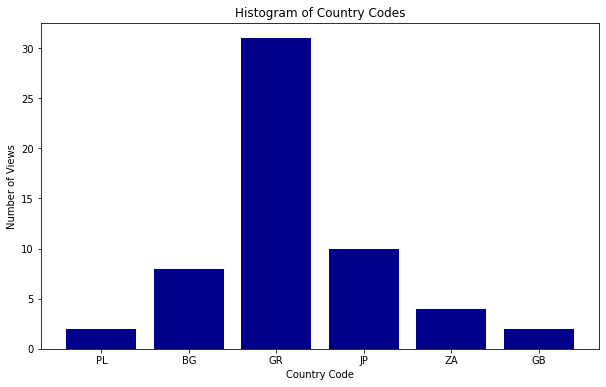

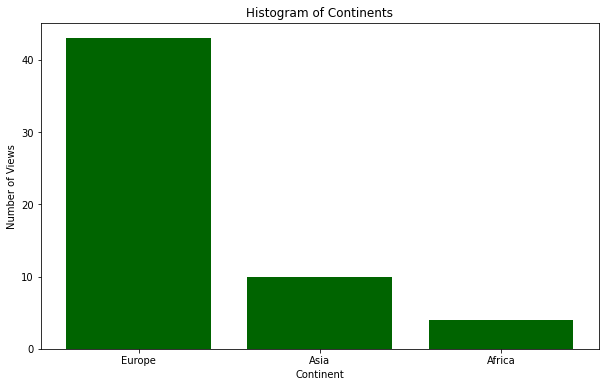

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import pycountry_convert as pc

# Function to create a histogram
def create_histogram(data, title, xlabel, ylabel='Number of Views', color='darkblue'):
    # Create a figure
    plt.figure(figsize=(10, 6))
    # Create a bar plot
    plt.bar(data.keys(), data.values(), color=color)
    # Add a title and axis labels
    plt.title(title)
    # Print x label
    plt.xlabel(xlabel)
    # Print y label
    plt.ylabel(ylabel)
    # Show the plot
    plt.show()

# Function to plot countries for each document
def plot_countries(doc_id):
    # Filter views for the specific document and check if 'env_doc_id' exists in the record
    filtered_data = [entry['visitor_country'] for entry in data if 'env_doc_id' in entry and entry['env_doc_id'] == doc_id]
    # Count occurrences of each country code
    country_count = Counter(filtered_data)
    # Create a histogram for country codes
    create_histogram(country_count, 'Histogram of Country Codes', 'Country Code')

# This function will use the pycountry_convert library to map country codes to continent names
def map_country_to_continent(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        # If the country code is not found, return 'Unknown'
        return 'Unknown'

def plot_continents(doc_id):
    # Filter views for the specific document and check if 'env_doc_id' exists in the record
    filtered_data = [entry['visitor_country'] for entry in data if 'env_doc_id' in entry and entry['env_doc_id'] == doc_id]
    # Map country codes to continents
    continent_data = [map_country_to_continent(country_code) for country_code in filtered_data]
    # Count occurrences of each continent
    continent_count = Counter(continent_data)
    # Create a histogram for continents
    create_histogram(continent_count, 'Histogram of Continents', 'Continent', color='darkgreen')

# Example usage
doc_id = '131224090853-45a33eba6ddf71f348aef7557a86ca5f'
plot_countries(doc_id)
plot_continents(doc_id)
